In [3]:
import numpy as np
import phate
import scprep
import pandas as pd

In [4]:
data = np.load('../data/old/eb_hv_pca_subset.npy')

In [5]:
phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate = phate_operator.fit_transform(data)

Calculating PHATE...
  Running PHATE on 3000 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...


    Calculated KNN search in 0.65 seconds.
    Calculating affinities...
    Calculated affinities in 0.60 seconds.
  Calculated graph and diffusion operator in 1.27 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.41 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.54 seconds.
  Calculated landmark operator in 6.25 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 4.10 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 12.81 seconds.
Calculated PHATE in 24.46 seconds.


<Axes: xlabel='PHATE 1', ylabel='PHATE 2'>

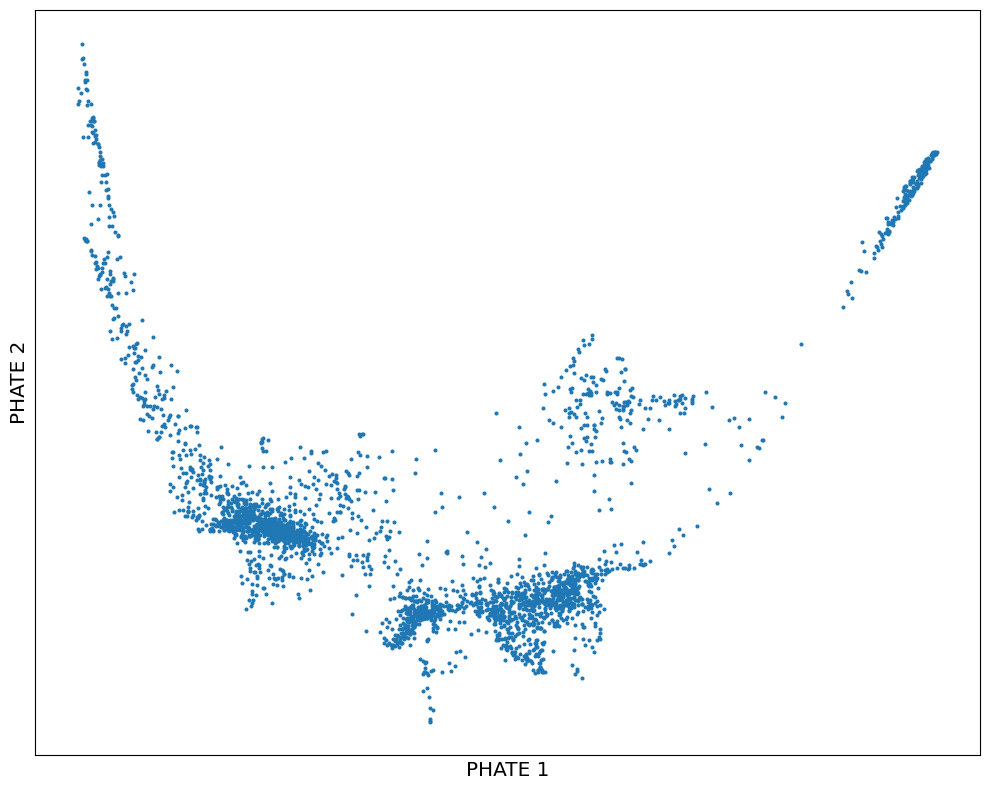

In [6]:
scprep.plot.scatter2d(Y_phate, figsize=(10,8),
                      ticks=False, label_prefix="PHATE ")

In [7]:
phate_operator.diff_op.shape

(1804, 1804)

In [8]:
phate_operator.diff_potential.shape

(3000, 1804)

In [9]:
data.shape

(3000, 50)

In [10]:
# np.save("../data/eb_hv_pca_subset_potential.npy", phate_operator.diff_potential)
# np.save("../data/eb_hv_pca_subset_phate.npy", Y_phate)

In [11]:
from scipy.spatial.distance import pdist, squareform, cdist

In [12]:
X_dist = squareform(pdist(phate_operator.diff_potential))

In [13]:
# np.save("../data/eb_hv_pca_subset_pdist.npy", X_dist)

In [14]:
X_dist2 = cdist(phate_operator.diff_potential, phate_operator.diff_potential)

In [15]:
np.equal(X_dist, X_dist2).all()

True

In [16]:
colors = pd.read_csv("../data/old/eb_hv_pca_subset_colors.csv", index_col=0)

In [17]:
colors.values

array([['Day 06-09'],
       ['Day 12-15'],
       ['Day 12-15'],
       ...,
       ['Day 00-03'],
       ['Day 00-03'],
       ['Day 18-21']], dtype=object)

In [18]:
# np.savez('../data/eb_subset.npz', data=data, phate=Y_phate, dist=X_dist, color=colors.values)

In [19]:
# datas = np.load('../data/eb_subset.npz')

In [21]:
# datas.files .

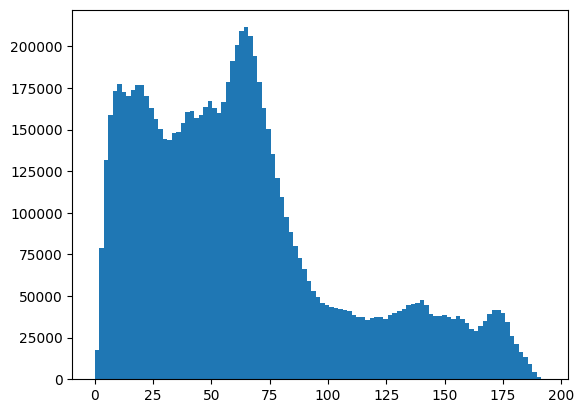

In [22]:
import matplotlib.pyplot as plt
plt.hist(X_dist.flatten(), bins=100)
plt.show()

In [23]:
X_dist_phate = squareform(pdist(Y_phate))

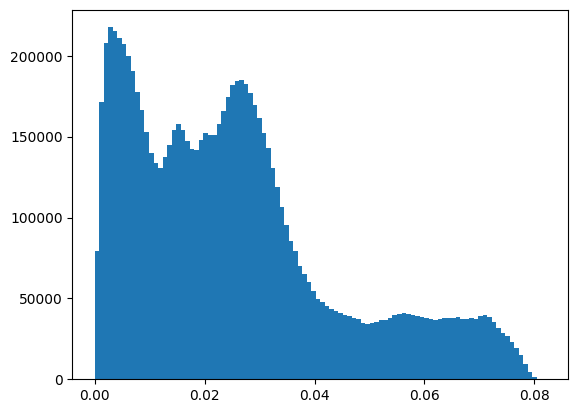

In [24]:
import matplotlib.pyplot as plt
plt.hist(X_dist_phate.flatten(), bins=100)
plt.show()

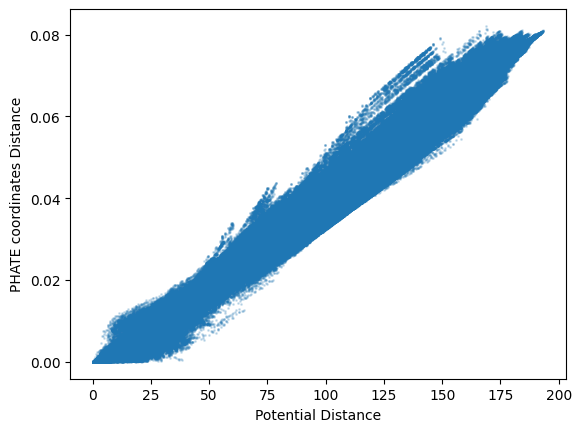

In [25]:
plt.figure()
plt.scatter(X_dist.flatten(), X_dist_phate.flatten(), s=1, alpha=0.1)
plt.xlabel("Potential Distance")
plt.ylabel("PHATE coordinates Distance")
plt.show()

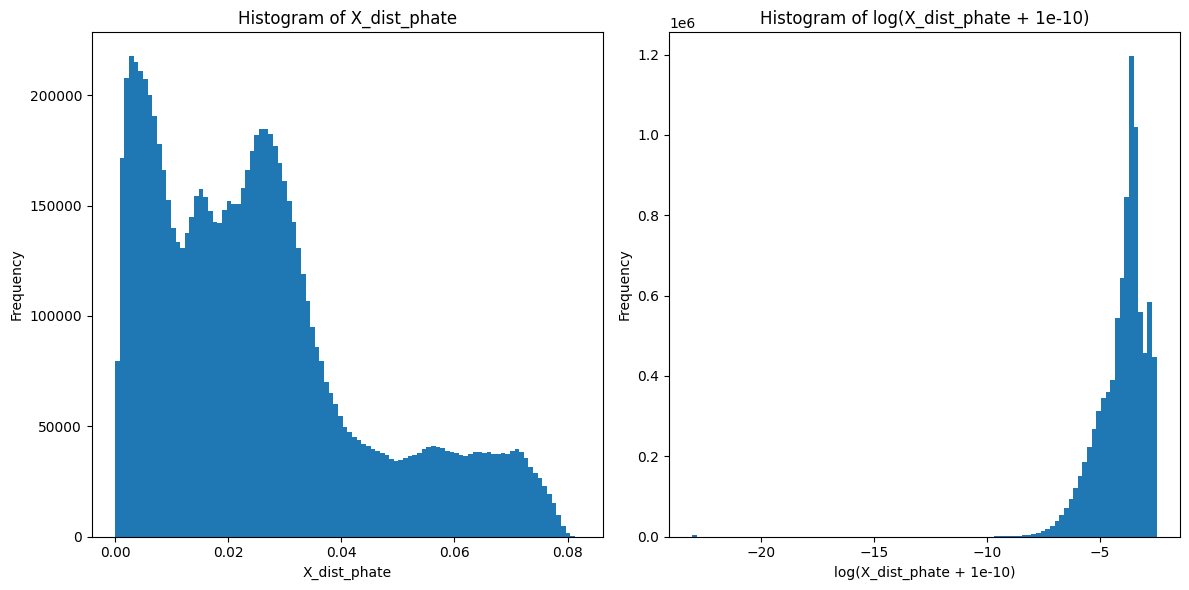

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(X_dist_phate.flatten(), bins=100)
axs[0].set_title("Histogram of X_dist_phate")
axs[0].set_xlabel("X_dist_phate")
axs[0].set_ylabel("Frequency")

axs[1].hist(np.log(X_dist_phate.flatten() + 1e-10), bins=100)
axs[1].set_title("Histogram of log(X_dist_phate + 1e-10)")
axs[1].set_xlabel("log(X_dist_phate + 1e-10)")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

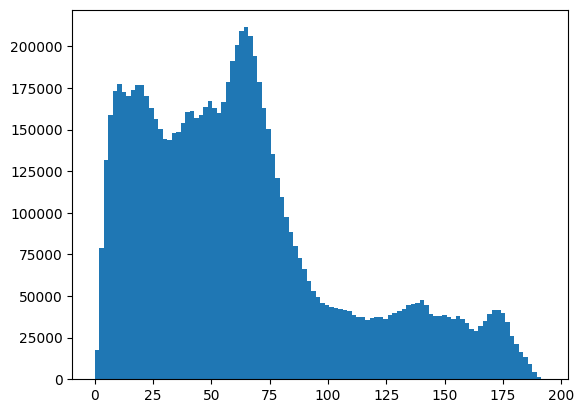

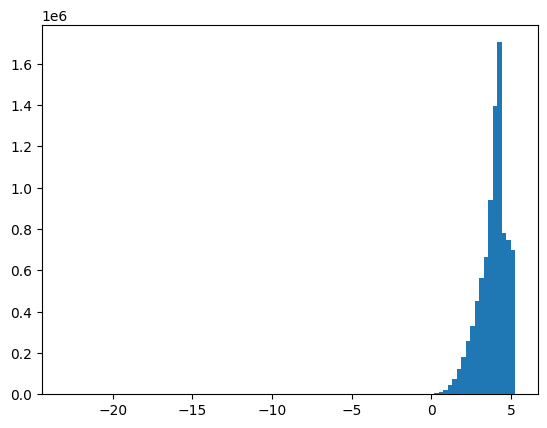

In [27]:
plt.hist(X_dist.flatten(), bins=100)
plt.show()
plt.hist(np.log(X_dist.flatten() + 1e-10), bins=100)
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

ImportError: cannot import name 'LogTransformer' from 'sklearn.preprocessing' (/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/sklearn/preprocessing/__init__.py)

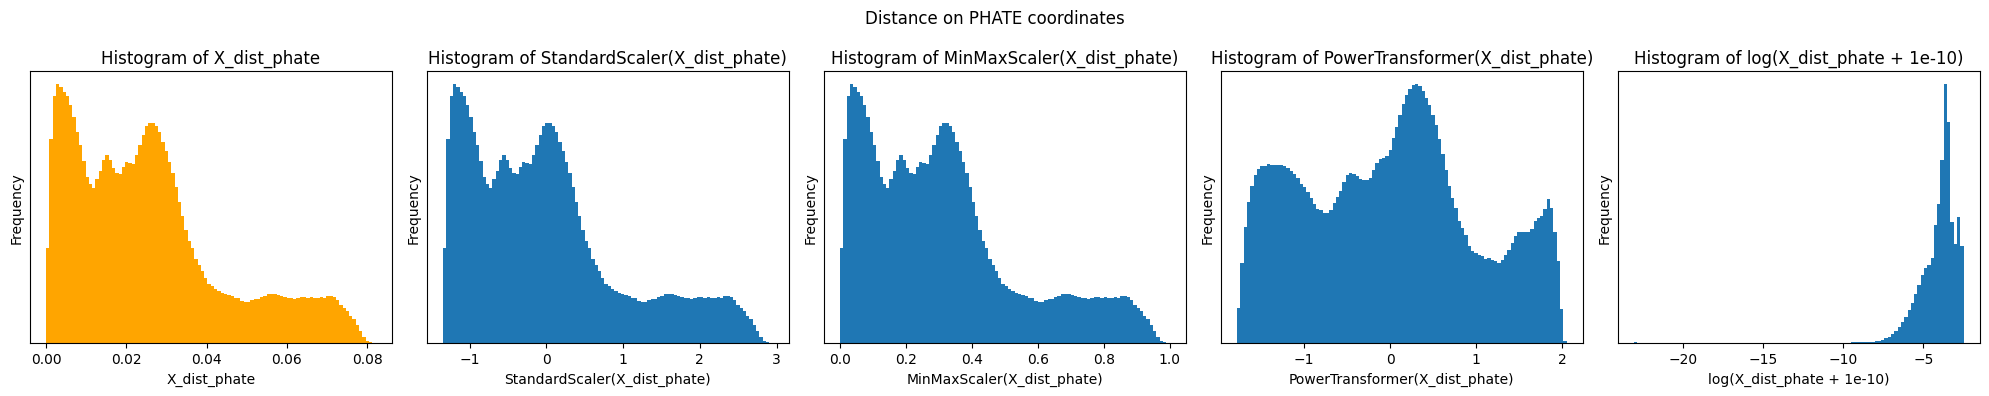

In [48]:
ss = StandardScaler()
mm = MinMaxScaler()
pt = PowerTransformer()
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Plot histogram of X_dist_phate
axs[0].hist(X_dist_phate.flatten(), bins=100, color='orange')
axs[0].set_title("Histogram of X_dist_phate")
axs[0].set_xlabel("X_dist_phate")
axs[0].set_ylabel("Frequency")
axs[0].set_yticks([])  # Turn off y ticks

# Plot histogram of X_dist_phate after StandardScaler transformation
X_dist_phate_ss = ss.fit_transform(X_dist_phate.flatten().reshape(-1,1))
axs[1].hist(X_dist_phate_ss, bins=100)
axs[1].set_title("Histogram of StandardScaler(X_dist_phate)")
axs[1].set_xlabel("StandardScaler(X_dist_phate)")
axs[1].set_ylabel("Frequency")
axs[1].set_yticks([])  # Turn off y ticks

# Plot histogram of X_dist_phate after MinMaxScaler transformation
X_dist_phate_mm = mm.fit_transform(X_dist_phate.flatten().reshape(-1,1))
axs[2].hist(X_dist_phate_mm, bins=100)
axs[2].set_title("Histogram of MinMaxScaler(X_dist_phate)")
axs[2].set_xlabel("MinMaxScaler(X_dist_phate)")
axs[2].set_ylabel("Frequency")
axs[2].set_yticks([])  # Turn off y ticks

# Plot histogram of X_dist_phate after PowerTransformer transformation
X_dist_phate_pt = pt.fit_transform(X_dist_phate.flatten().reshape(-1,1))
axs[3].hist(X_dist_phate_pt, bins=100)
axs[3].set_title("Histogram of PowerTransformer(X_dist_phate)")
axs[3].set_xlabel("PowerTransformer(X_dist_phate)")
axs[3].set_ylabel("Frequency")
axs[3].set_yticks([])  # Turn off y ticks

X_dist_phate_log = np.log(X_dist_phate + 1e-10)
axs[4].hist(X_dist_phate_log.flatten(), bins=100)
axs[4].set_title("Histogram of log(X_dist_phate + 1e-10)")
axs[4].set_xlabel("log(X_dist_phate + 1e-10)")
axs[4].set_ylabel("Frequency")
axs[4].set_yticks([])  # Turn off y ticks

plt.suptitle("Distance on PHATE coordinates")
plt.tight_layout()
plt.show()


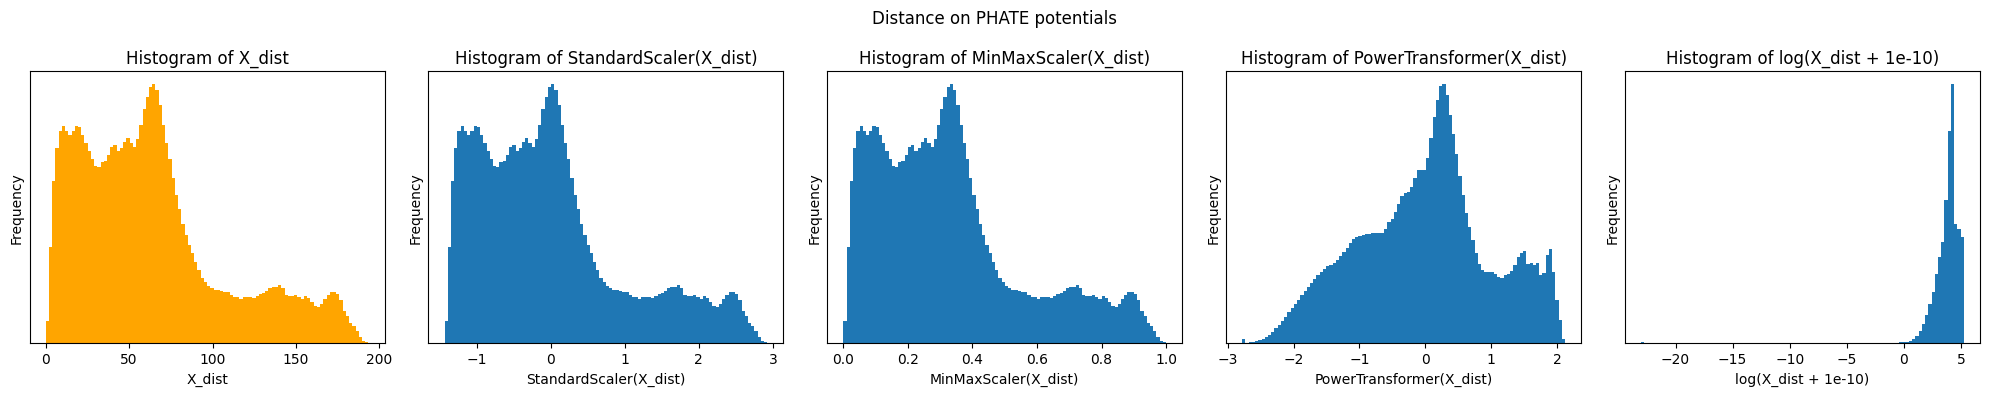

In [49]:
ss = StandardScaler()
mm = MinMaxScaler()
pt = PowerTransformer()
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Plot histogram of X_dist
axs[0].hist(X_dist.flatten(), bins=100, color='orange')
axs[0].set_title("Histogram of X_dist")
axs[0].set_xlabel("X_dist")
axs[0].set_ylabel("Frequency")
axs[0].set_yticks([])  # Turn off y ticks

# Plot histogram of X_dist after StandardScaler transformation
X_dist_ss = ss.fit_transform(X_dist.flatten().reshape(-1,1))
axs[1].hist(X_dist_ss, bins=100)
axs[1].set_title("Histogram of StandardScaler(X_dist)")
axs[1].set_xlabel("StandardScaler(X_dist)")
axs[1].set_ylabel("Frequency")
axs[1].set_yticks([])  # Turn off y ticks

# Plot histogram of X_dist after MinMaxScaler transformation
X_dist_mm = mm.fit_transform(X_dist.flatten().reshape(-1,1))
axs[2].hist(X_dist_mm, bins=100)
axs[2].set_title("Histogram of MinMaxScaler(X_dist)")
axs[2].set_xlabel("MinMaxScaler(X_dist)")
axs[2].set_ylabel("Frequency")
axs[2].set_yticks([])  # Turn off y ticks

# Plot histogram of X_dist after PowerTransformer transformation
X_dist_pt = pt.fit_transform(X_dist.flatten().reshape(-1,1))
axs[3].hist(X_dist_pt, bins=100)
axs[3].set_title("Histogram of PowerTransformer(X_dist)")
axs[3].set_xlabel("PowerTransformer(X_dist)")
axs[3].set_ylabel("Frequency")
axs[3].set_yticks([])  # Turn off y ticks

X_dist_log = np.log(X_dist + 1e-10)
axs[4].hist(X_dist_log.flatten(), bins=100)
axs[4].set_title("Histogram of log(X_dist + 1e-10)")
axs[4].set_xlabel("log(X_dist + 1e-10)")
axs[4].set_ylabel("Frequency")
axs[4].set_yticks([])  # Turn off y ticks

plt.suptitle("Distance on PHATE potentials")
plt.tight_layout()
plt.show()
